<a href="https://colab.research.google.com/github/unanida/IT-BI2022/blob/main/ITB_%EA%B0%9C%EC%9D%B8%EA%B3%BC%EC%A0%9C2_kyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**전체 응답자의 성비 확인**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel("MF_Kg.xlsx")
display(df) 

,MF,Kg
0,M,60
1,F,65
2,F,55
3,M,70
4,F,50
...,...,...
9995,F,55
9996,F,55
9997,M,80
9998,F,55


      Kg
MF      
F   4862
M   5138


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


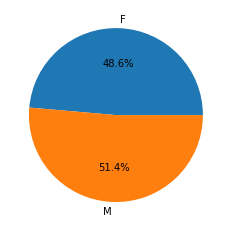

In [ ]:
#is_M = df['MF'] == 'M'
import matplotlib as mpl               # 기본 설정
import matplotlib.pyplot as plt        # 그래프 관련
import matplotlib.font_manager as fm
x = df.groupby('MF').count()
print(x)
#plt.figure(figsize(5,5))
plt.pie(x,labels=['F','M'],autopct='%.1f%%')
plt.show()

**원본 데이터 불러오기**

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib as mpl               
import matplotlib.pyplot as plt        
import matplotlib.font_manager as fm

df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/health_data.csv')
df

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020,9996,44,F,13,155,55,83.0,1.2,1.2,...,0.7,20.0,21.0,20.0,No,Yes,0,NaN,NaN,12/29/2021
9996,2020,9997,43,F,11,160,55,77.5,1.0,1.2,...,0.7,24.0,22.0,21.0,No,Yes,1,0.0,0.0,12/29/2021
9997,2020,9998,45,M,12,160,80,93.0,0.6,0.6,...,1.0,22.0,27.0,35.0,No,No,0,NaN,NaN,12/29/2021
9998,2020,9999,27,F,15,155,55,78.0,0.6,1.0,...,1.0,26.0,24.0,21.0,No,No,0,NaN,NaN,12/29/2021


In [12]:
df_cal_bmi = df[['체중(5Kg 단위)','신장(5Cm단위)']]
df_cal_bmi.columns = ['weight','height']
bmi = df_cal_bmi.weight / ((df_cal_bmi.height/100) * (df_cal_bmi.height/100))

bmi

0       22.038567
1       28.888889
2       22.892820
3       27.343750
4       20.811655
          ...    
9995    22.892820
9996    21.484375
9997    31.250000
9998    22.892820
9999    29.296875
Length: 10000, dtype: float64

In [13]:
df_bmi_base =df.drop(['기준년도','가입자일련번호','시도코드','시력(좌)','시력(우)','청력(좌)','청력(우)','요단백','구강검진수검여부','치아우식증유무','치석','데이터공개일자','신장(5Cm단위)','체중(5Kg 단위)'],axis=1)
df_bmi_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   성별코드         10000 non-null  object 
 1   연령대코드(5세단위)  10000 non-null  int64  
 2   허리둘레         10000 non-null  float64
 3   수축기혈압        9912 non-null   float64
 4   이완기혈압        9912 non-null   float64
 5   식전혈당(공복혈당)   9912 non-null   float64
 6   총콜레스테롤       4044 non-null   float64
 7   트리글리세라이드     4044 non-null   float64
 8   HDL콜레스테롤     4044 non-null   float64
 9   LDL콜레스테롤     3977 non-null   float64
 10  혈색소          9912 non-null   float64
 11  혈청크레아티닌      9912 non-null   float64
 12  (혈청지오티)AST   9912 non-null   float64
 13  (혈청지오티)ALT   9912 non-null   float64
 14  감마지티피        9912 non-null   float64
 15  흡연상태         9998 non-null   object 
 16  음주여부         9999 non-null   object 
dtypes: float64(13), int64(1), object(3)
memory usage: 1.3+ MB


In [14]:
df_bmi_base.fillna(df_bmi_base.mean())
df_bmi_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   성별코드         10000 non-null  object 
 1   연령대코드(5세단위)  10000 non-null  int64  
 2   허리둘레         10000 non-null  float64
 3   수축기혈압        9912 non-null   float64
 4   이완기혈압        9912 non-null   float64
 5   식전혈당(공복혈당)   9912 non-null   float64
 6   총콜레스테롤       4044 non-null   float64
 7   트리글리세라이드     4044 non-null   float64
 8   HDL콜레스테롤     4044 non-null   float64
 9   LDL콜레스테롤     3977 non-null   float64
 10  혈색소          9912 non-null   float64
 11  혈청크레아티닌      9912 non-null   float64
 12  (혈청지오티)AST   9912 non-null   float64
 13  (혈청지오티)ALT   9912 non-null   float64
 14  감마지티피        9912 non-null   float64
 15  흡연상태         9998 non-null   object 
 16  음주여부         9999 non-null   object 
dtypes: float64(13), int64(1), object(3)
memory usage: 1.3+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [15]:
df_bmi = pd.concat([df_bmi_base,bmi],axis=1)
df_bmi.rename(columns = {0:'bmi'},inplace=True)
df_bmi.head()

,성별코드,연령대코드(5세단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,bmi
0,M,9,72.1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.1,21.0,27.0,21.0,No,No,22.038567
1,F,13,81.0,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,0.5,18.0,15.0,15.0,No,No,28.888889
2,F,12,70.0,123.0,80.0,102.0,NaN,NaN,NaN,NaN,12.8,0.7,27.0,25.0,7.0,No,No,22.892820
3,M,13,90.8,134.0,84.0,146.0,NaN,NaN,NaN,NaN,16.4,1.2,65.0,97.0,72.0,No,No,27.343750
4,F,12,75.2,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,0.7,18.0,17.0,14.0,No,No,20.811655


In [16]:
df_bmi.replace('NotNow',0,inplace=True)
df_bmi.replace('No',0,inplace=True)
df_bmi.replace('Yes',1,inplace=True)
df_bmi.replace('M',0,inplace=True)
df_bmi.replace('F',1,inplace=True)
df_bmi.head()

,성별코드,연령대코드(5세단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,bmi
0,0,9,72.1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.1,21.0,27.0,21.0,0.0,0.0,22.038567
1,1,13,81.0,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,0.5,18.0,15.0,15.0,0.0,0.0,28.888889
2,1,12,70.0,123.0,80.0,102.0,NaN,NaN,NaN,NaN,12.8,0.7,27.0,25.0,7.0,0.0,0.0,22.892820
3,0,13,90.8,134.0,84.0,146.0,NaN,NaN,NaN,NaN,16.4,1.2,65.0,97.0,72.0,0.0,0.0,27.343750
4,1,12,75.2,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,0.7,18.0,17.0,14.0,0.0,0.0,20.811655


**개인과제2: 분류과제:  각 신체 데이터별 BMI에 영향을 끼치는 정도**

In [ ]:
!pip install mglearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.2 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=d0e6e9ae9be3233b5ac5f28cf76346204c8bde9bf8457942ccb394e3b9bfc9b8
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [ ]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 4.6 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


In [ ]:
import mglearn

ModuleNotFoundError: ignored

In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns           # Seaborn 로딩하기
import matplotlib.pyplot as plt # Matplotlib의 pyplot 로딩하기

In [ ]:
health = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/health_data.csv")

print(health.columns)
display(health.info())      # 569행의 데이터 - id는 index이므로 생략됨, diagnosis와 30개 변수 (결측치 없음)  
display(health.head())

Index(['기준년도', '가입자일련번호', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '치석', '데이터공개일자'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)   

None

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


In [ ]:
health.describe()

,기준년도,가입자일련번호,시도코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,구강검진수검여부,치아우식증유무,치석
count,10000.0,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,3977.000000,9912.000000,9861.000000,9912.000000,9912.00000,9912.000000,9912.000000,10000.000000,3251.000000,3251.000000
mean,2020.0,5000.50000,34.100100,11.931400,160.983500,63.034500,82.366100,0.933750,0.936750,1.050500,...,116.263264,14.214255,1.119461,0.848484,27.58979,26.789851,38.098668,0.325100,0.175331,0.579514
std,0.0,2886.89568,12.394581,2.166048,9.211608,12.205294,9.561973,0.662057,0.641378,0.227936,...,37.829955,1.555386,0.489782,0.301012,17.88442,23.735687,58.184579,0.468436,0.380308,0.591269
min,2020.0,1.00000,11.000000,9.000000,130.000000,30.000000,53.000000,0.100000,0.100000,1.000000,...,13.000000,5.100000,1.000000,0.050000,3.00000,2.000000,3.000000,0.000000,0.000000,0.000000
25%,2020.0,2500.75000,27.000000,10.000000,155.000000,55.000000,76.000000,0.700000,0.700000,1.000000,...,89.000000,13.200000,1.000000,0.700000,20.00000,16.000000,16.000000,0.000000,0.000000,0.000000
50%,2020.0,5000.50000,41.000000,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,1.000000,...,115.000000,14.200000,1.000000,0.800000,24.00000,21.000000,24.000000,0.000000,0.000000,1.000000
75%,2020.0,7500.25000,44.000000,13.000000,170.000000,70.000000,88.900000,1.200000,1.200000,1.000000,...,141.000000,15.300000,1.000000,1.000000,30.00000,31.000000,39.000000,1.000000,0.000000,1.000000
max,2020.0,10000.00000,49.000000,18.000000,195.000000,130.000000,134.000000,9.900000,9.900000,3.000000,...,297.000000,20.000000,6.000000,9.200000,692.00000,1146.000000,2322.000000,1.000000,1.000000,2.000000


No        6231
NotNow    1926
Yes       1841
Name: 흡연상태, dtype: int64


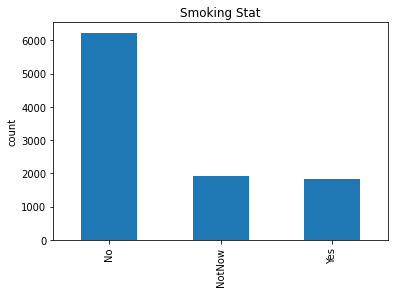

In [ ]:
print(health['흡연상태'].value_counts())

health['흡연상태'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('Smoking Stat')
plt.show()

In [ ]:
!pip install mglearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import mglearn

In [ ]:
import sys
!{sys.executable} -m pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.1 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=a976cbdffea6119b12cebf1c811242ecb3a65566c2888fcbbc0d5f2913b9ce33
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


**개인과제2: 분류과제:  각 신체 데이터별 BMI에 영향을 끼치는 정도**

In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns           # Seaborn 로딩하기
import matplotlib.pyplot as plt # Matplotlib의 pyplot 로딩하기

In [18]:
df_cal_bmi = df[['체중(5Kg 단위)','신장(5Cm단위)']]
df_cal_bmi.columns = ['weight','height']
bmi = df_cal_bmi.weight / ((df_cal_bmi.height/100) * (df_cal_bmi.height/100))

bmi

0       22.038567
1       28.888889
2       22.892820
3       27.343750
4       20.811655
          ...    
9995    22.892820
9996    21.484375
9997    31.250000
9998    22.892820
9999    29.296875
Length: 10000, dtype: float64

In [19]:
df_bmi_base =df.drop(['기준년도','가입자일련번호','시도코드','시력(좌)','시력(우)','청력(좌)','청력(우)','요단백','구강검진수검여부','치아우식증유무','치석','데이터공개일자','신장(5Cm단위)','체중(5Kg 단위)'],axis=1)
df_bmi_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   성별코드         10000 non-null  object 
 1   연령대코드(5세단위)  10000 non-null  int64  
 2   허리둘레         10000 non-null  float64
 3   수축기혈압        9912 non-null   float64
 4   이완기혈압        9912 non-null   float64
 5   식전혈당(공복혈당)   9912 non-null   float64
 6   총콜레스테롤       4044 non-null   float64
 7   트리글리세라이드     4044 non-null   float64
 8   HDL콜레스테롤     4044 non-null   float64
 9   LDL콜레스테롤     3977 non-null   float64
 10  혈색소          9912 non-null   float64
 11  혈청크레아티닌      9912 non-null   float64
 12  (혈청지오티)AST   9912 non-null   float64
 13  (혈청지오티)ALT   9912 non-null   float64
 14  감마지티피        9912 non-null   float64
 15  흡연상태         9998 non-null   object 
 16  음주여부         9999 non-null   object 
dtypes: float64(13), int64(1), object(3)
memory usage: 1.3+ MB


In [20]:
df_bmi_base.fillna(df_bmi_base.mean())
df_bmi_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   성별코드         10000 non-null  object 
 1   연령대코드(5세단위)  10000 non-null  int64  
 2   허리둘레         10000 non-null  float64
 3   수축기혈압        9912 non-null   float64
 4   이완기혈압        9912 non-null   float64
 5   식전혈당(공복혈당)   9912 non-null   float64
 6   총콜레스테롤       4044 non-null   float64
 7   트리글리세라이드     4044 non-null   float64
 8   HDL콜레스테롤     4044 non-null   float64
 9   LDL콜레스테롤     3977 non-null   float64
 10  혈색소          9912 non-null   float64
 11  혈청크레아티닌      9912 non-null   float64
 12  (혈청지오티)AST   9912 non-null   float64
 13  (혈청지오티)ALT   9912 non-null   float64
 14  감마지티피        9912 non-null   float64
 15  흡연상태         9998 non-null   object 
 16  음주여부         9999 non-null   object 
dtypes: float64(13), int64(1), object(3)
memory usage: 1.3+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [21]:
df_bmi_base.fillna(df_bmi_base.mean())
df_bmi_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   성별코드         10000 non-null  object 
 1   연령대코드(5세단위)  10000 non-null  int64  
 2   허리둘레         10000 non-null  float64
 3   수축기혈압        9912 non-null   float64
 4   이완기혈압        9912 non-null   float64
 5   식전혈당(공복혈당)   9912 non-null   float64
 6   총콜레스테롤       4044 non-null   float64
 7   트리글리세라이드     4044 non-null   float64
 8   HDL콜레스테롤     4044 non-null   float64
 9   LDL콜레스테롤     3977 non-null   float64
 10  혈색소          9912 non-null   float64
 11  혈청크레아티닌      9912 non-null   float64
 12  (혈청지오티)AST   9912 non-null   float64
 13  (혈청지오티)ALT   9912 non-null   float64
 14  감마지티피        9912 non-null   float64
 15  흡연상태         9998 non-null   object 
 16  음주여부         9999 non-null   object 
dtypes: float64(13), int64(1), object(3)
memory usage: 1.3+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [22]:
df_bmi.replace('NotNow',0,inplace=True)
df_bmi.replace('No',0,inplace=True)
df_bmi.replace('Yes',1,inplace=True)
df_bmi.replace('M',0,inplace=True)
df_bmi.replace('F',1,inplace=True)
df_bmi.head()

,성별코드,연령대코드(5세단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,bmi
0,0,9,72.1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.1,21.0,27.0,21.0,0.0,0.0,22.038567
1,1,13,81.0,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,0.5,18.0,15.0,15.0,0.0,0.0,28.888889
2,1,12,70.0,123.0,80.0,102.0,NaN,NaN,NaN,NaN,12.8,0.7,27.0,25.0,7.0,0.0,0.0,22.892820
3,0,13,90.8,134.0,84.0,146.0,NaN,NaN,NaN,NaN,16.4,1.2,65.0,97.0,72.0,0.0,0.0,27.343750
4,1,12,75.2,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,0.7,18.0,17.0,14.0,0.0,0.0,20.811655


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47161 missing from current font.
  font.set_

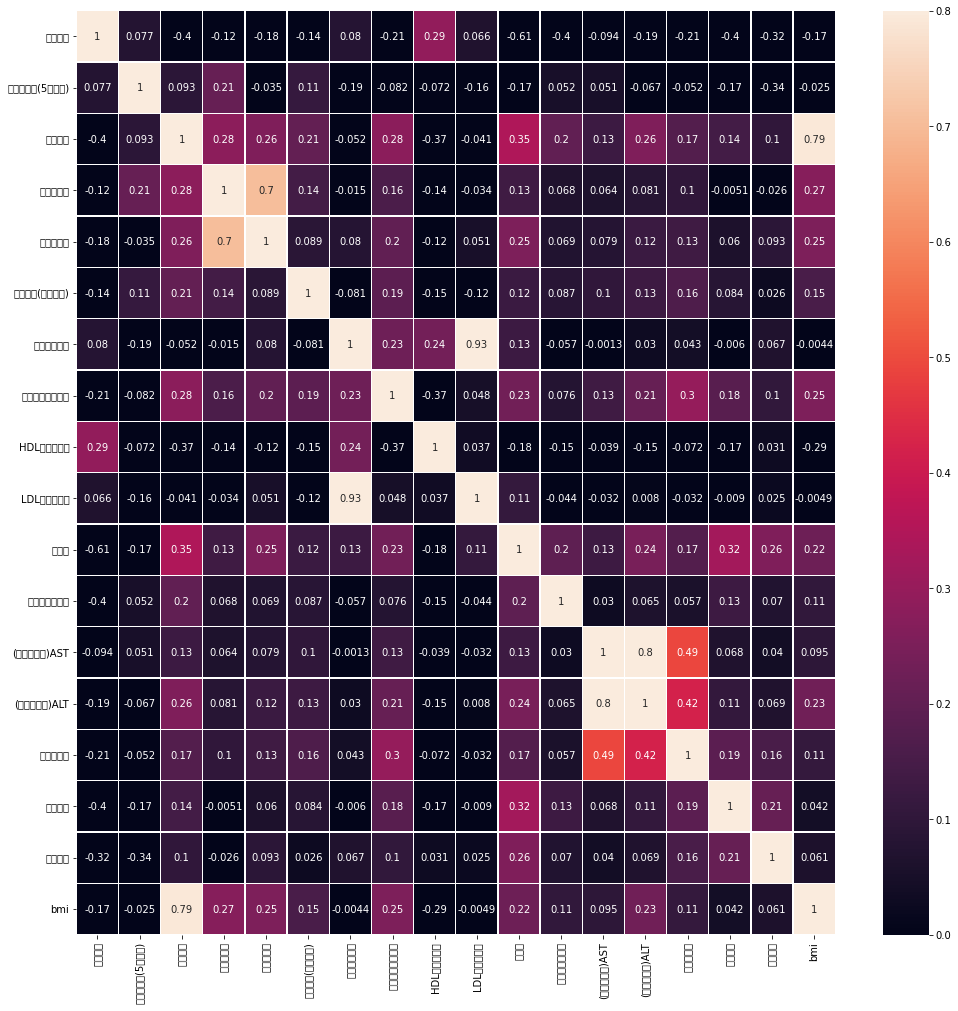

In [23]:
df_bmi['bmi'].value_counts() # 특정 요소의 분류
df_bmi.describe() # 데이터 17개 특성별 통계치 확인
df_bmi.corr() # 특성 간 상관 관계가 높을수록 1, 낮을수록 -1에 가까운 값 출력

plt.figure(figsize=(17,17))

sns.heatmap(df_bmi.corr(),vmax=0.8,vmin=0,linewidths=0.3,linecolor='white',annot=True)
#2차원으로 배열된 데이터 값을 색상으로 표현해주는 그래프
#corr() 함수와 결과값을 인자로 전달하여 각 특성 간 상관관계를 색상을 통해 확인할 수 있음
#vmax : 색상으로 표현할 최대값 (0,5 이상의 값은 모두 같은 색상으로 표시)
#vmax : 색상으로 표현할 최소값 (0 이하의 값은 모두 같은 색상으로 표시)
#linewidths : 각항목을 구분하는 선의 넒이

plt.show()


**결과 해석**

각 신체 데이터별 BMI 지수에 영향을 미치는 정도를 분류해본 결과 허리둘레가 0.79로 가장 연관성이 높았다. 

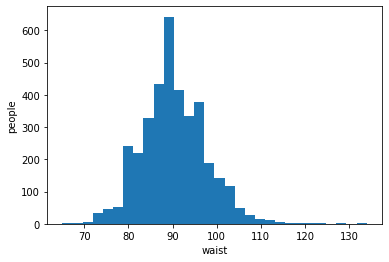

In [24]:
#비만 기준인 bmi 25.0 이상인 사람들의 허리둘레 분포도
plt.hist(x=[df_bmi.허리둘레[df_bmi.bmi >= 25]],bins=30, histtype ='barstacked')
plt.xlabel('waist')
plt.ylabel('people')

plt.show()

**결과해석**

추가로 BMI지수가 비만 기준을 넘어서는 사람들의 허리둘레를 확인한 결과 허리둘레가 90에 가까운 사람들이 가장 많았다.